1. Data Cleaning and Preprocessing (1 Mark)


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [66]:
# Load the dataset
data = pd.read_csv('Algerian_forest_fires_cleaned.csv')

# show the firts row
print(data.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [68]:
# Review unique values ​​in column "Classes"
unique_classes = data['Classes'].unique()
print(unique_classes)

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [69]:
# Remove whitespace before mapping
data['Classes'] = data['Classes'].str.strip()

In [70]:
# Review unique values ​​in column "Classes"
unique_classes = data['Classes'].unique()
print(unique_classes)

['not fire' 'fire']


In [71]:
# Transform the column "Classes" using map()
data['Classes'] = data['Classes'].map({'not fire': 0, 'fire': 1})

# verify the change
print(data[['Classes']].head())

   Classes
0        0
1        0
2        0
3        0
4        0


In [72]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


2. Data Visualization and Observations (1 Mark)


Most days have a temperature between 30°C and 35°C,
with few days reaching 22°C or 42°C.


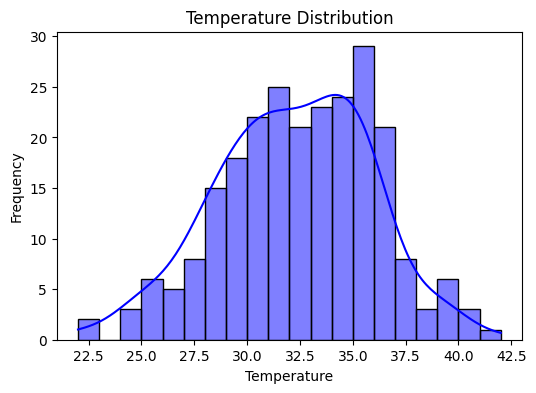

In [73]:
# column histogram 'Temperature'
plt.figure(figsize=(6, 4))
sns.histplot(data['Temperature'], kde=True, bins=20, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
print('Most days have a temperature between 30°C and 35°C,\nwith few days reaching 22°C or 42°C.',)
plt.show()

At higher temperatures, relative humidity tends to decrease. 
We can also notice differences in humidity between days with fire and without fire.


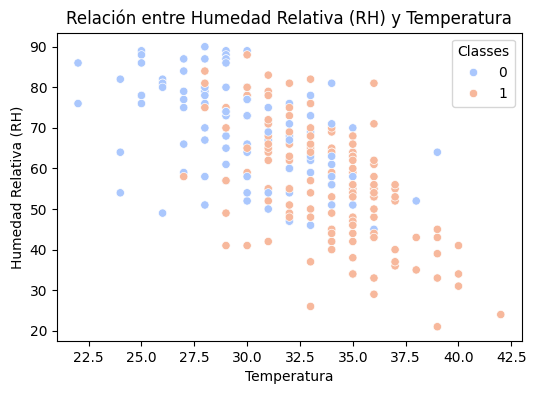

In [74]:
# Scatter plot between RH and temperature
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Temperature', y='RH', data=data, hue='Classes', palette='coolwarm')
plt.title('Relación entre Humedad Relativa (RH) y Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Humedad Relativa (RH)')
print('At higher temperatures, relative humidity tends to decrease. \nWe can also notice differences in humidity between days with fire and without fire.')
plt.show()


Days with fire generally have higher FWI values ​​compared to days without fire.
 This suggests that the FWI could be a good predictor for wildfires.


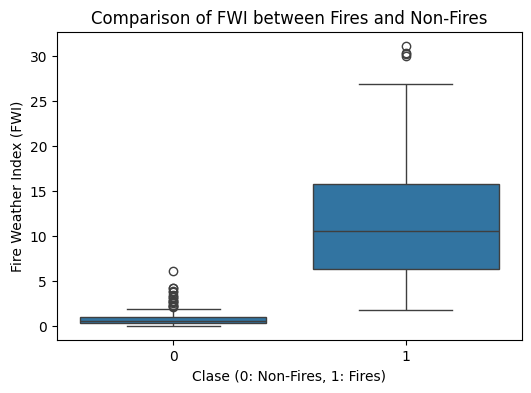

In [75]:
# Boxplot del FWI agrupado por la columna "Classes"
plt.figure(figsize=(6, 4))
sns.boxplot(x='Classes', y='FWI', data=data)
plt.title('Comparison of FWI between Fires and Non-Fires')
plt.xlabel('Clase (0: Non-Fires, 1: Fires)')
plt.ylabel('Fire Weather Index (FWI)')
print('Days with fire generally have higher FWI values ​​compared to days without fire.\n This suggests that the FWI could be a good predictor for wildfires.')
plt.show()


It is possible that variables such as FFMC, DMC, and ISI are strongly 
correlated with the occurrence of fires.


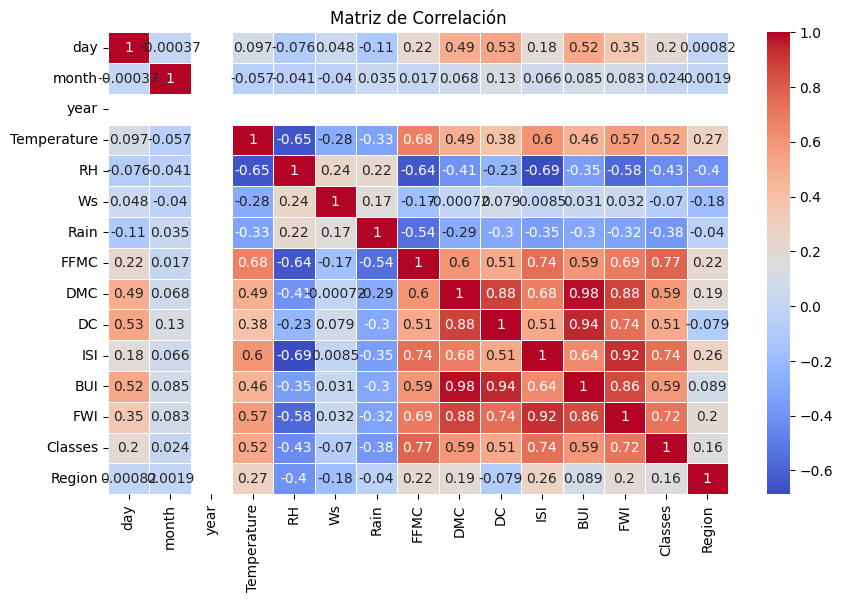

In [76]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
print('It is possible that variables such as FFMC, DMC, and ISI are strongly \ncorrelated with the occurrence of fires.')
plt.show()


3. Model Development and Analysis (1.5 Marks)

In [77]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the independent variables and the dependent variable
X = data[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]  # Variables independientes
y = data['Classes']  # Variable dependiente

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the mode
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('multiple linear regression: Model to predict if there will be a fire (Classes) based on multiple independent variables')
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


multiple linear regression: Model to predict if there will be a fire (Classes) based on multiple independent variables
Mean Squared Error (MSE): 0.08347238906971761
R-squared (R2): 0.6625972960330102


In [78]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (grade 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split data into training and test sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model with polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)

# Make predictions on the test set
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print('Polynomial Regression: Fit the model to non-linear relationships using polynomial features')
print(f"Polynomial Model - Mean Squared Error (MSE): {mse_poly}")
print(f"Polynomial Model - R-squared (R2): {r2_poly}")


Polynomial Regression: Fit the model to non-linear relationships using polynomial features
Polynomial Model - Mean Squared Error (MSE): 0.2561336443085582
Polynomial Model - R-squared (R2): -0.035314612769104636


In [79]:
from sklearn.linear_model import Lasso, Ridge

# Regularization with Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('Regularization Lasso and Ridge: Regularization techniques to avoid overfitting. \nLasso penalizes the coefficients of the least relevant variables, \nwhile Ridge distributes the penalty across all variables.')
print(f"Lasso Model - Mean Squared Error (MSE): {mse_lasso}")
print(f"Lasso Model - R-squared (R2): {r2_lasso}")

# Regularization with Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate the Ridge Model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Model - Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Model - R-squared (R2): {r2_ridge}")


Regularization Lasso and Ridge: Regularization techniques to avoid overfitting. 
Lasso penalizes the coefficients of the least relevant variables, 
while Ridge distributes the penalty across all variables.
Lasso Model - Mean Squared Error (MSE): 0.09512961337829835
Lasso Model - R-squared (R2): 0.6154777748799758
Ridge Model - Mean Squared Error (MSE): 0.08347435460496586
Ridge Model - R-squared (R2): 0.6625893511674696


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the alpha values ​​to test
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Ridge and GridSearchCV
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, params, cv=5)

# Train with cross validation
ridge_cv.fit(X_train, y_train)

# See the best parameters found

print('Cross Validation and Hyperparameter Tuning: I used GridSearchCV to find the best parameters of the Ridge model and evaluate its performance.')
print(f"Best parameters for Ridge: {ridge_cv.best_params_}")

# Evaluate the best model on the test set
y_pred_best_ridge = ridge_cv.predict(X_test)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

print(f"Best Ridge Model - Mean Squared Error (MSE): {mse_best_ridge}")
print(f"Best Ridge Model - R-squared (R2): {r2_best_ridge}")


Cross Validation and Hyperparameter Tuning: I used GridSearchCV to find the best parameters of the Ridge model and evaluate its performance.
Best parameters for Ridge: {'alpha': 100}
Best Ridge Model - Mean Squared Error (MSE): 0.08526441783263133
Best Ridge Model - R-squared (R2): 0.6553537588953741


4. Model Evaluation and Testing (1 Mark)

In [81]:
# Import the additional metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Defines a function to evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Performance Metrics for {model_name}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")
    print("-" * 50)

# Evaluate linear regression
evaluate_model(y_test, y_pred, "Linear Regression")

# Evaluate polynomial regression
evaluate_model(y_test_poly, y_pred_poly, "Polynomial Regression")

# Evaluate Lasso
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# Evaluate Ridge
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")


Performance Metrics for Linear Regression:
Mean Squared Error (MSE): 0.08347238906971761
Mean Absolute Error (MAE): 0.24796311427950965
R-squared (R2): 0.6625972960330102
--------------------------------------------------
Performance Metrics for Polynomial Regression:
Mean Squared Error (MSE): 0.2561336443085582
Mean Absolute Error (MAE): 0.2602927295529113
R-squared (R2): -0.035314612769104636
--------------------------------------------------
Performance Metrics for Lasso Regression:
Mean Squared Error (MSE): 0.09512961337829835
Mean Absolute Error (MAE): 0.26918491035328423
R-squared (R2): 0.6154777748799758
--------------------------------------------------
Performance Metrics for Ridge Regression:
Mean Squared Error (MSE): 0.08347435460496586
Mean Absolute Error (MAE): 0.2479743849970376
R-squared (R2): 0.6625893511674696
--------------------------------------------------


In [83]:
# Predict on the test set (simulating unseen data)
y_pred_unseen = linear_reg.predict(X_test)

# Evaluate the model on unseen data
evaluate_model(y_test, y_pred_unseen, "Linear Regression on Unseen Data")

# Polinómico
y_pred_poly_unseen = poly_reg.predict(X_test_poly)
evaluate_model(y_test_poly, y_pred_poly_unseen, "Polynomial Regression on Unseen Data")

# Lasso
y_pred_lasso_unseen = lasso.predict(X_test)
evaluate_model(y_test, y_pred_lasso_unseen, "Lasso Regression on Unseen Data")


Performance Metrics for Linear Regression on Unseen Data:
Mean Squared Error (MSE): 0.08347238906971761
Mean Absolute Error (MAE): 0.24796311427950965
R-squared (R2): 0.6625972960330102
--------------------------------------------------
Performance Metrics for Polynomial Regression on Unseen Data:
Mean Squared Error (MSE): 0.2561336443085582
Mean Absolute Error (MAE): 0.2602927295529113
R-squared (R2): -0.035314612769104636
--------------------------------------------------
Performance Metrics for Lasso Regression on Unseen Data:
Mean Squared Error (MSE): 0.09512961337829835
Mean Absolute Error (MAE): 0.26918491035328423
R-squared (R2): 0.6154777748799758
--------------------------------------------------
